<a href="https://colab.research.google.com/github/AdelSobhy/CodeAlpha-ML/blob/main/CA_Task1_Credit_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Needed Libraries


In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#Mounting Google Drive

In [354]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/train_credit.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-354-cfda1f1638a0>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/ML/train_credit.csv')


#Taking a look

In [355]:
df.head(20)

ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj    28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj    28  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj    28  004-07-5839   
16  0x161a  CUS_0x2dbc   January           Langep    34  486-85-3974   
17  0x161b  CUS_0x2dbc  February              NaN    34  486-85-3974   
18  0x161c  CUS_0x2dbc     March           Langep    34  486-85-3974   
19  0x161d  CUS_0x2dbc     April           Langep    34  486-85-3974   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0   Scientist      19114.12            1824.843333                  3  ...   
1   Scientist      19114.12                    NaN                  3  ...   
2   Scientist      19114.12                    NaN                  3  ...   
3   Scientist      19114.12                    NaN                  3  ...   
4   Scientist      19114.12            1824.843333                  3  ...   
5   Scientist      19114.12                    NaN                  3  ...   
6   Scientist      19114.12            1824.843333                  3  ...   
7   Scientist      19114.12            1824.843333                  3  ...   
8     _______      34847.84            3037.986667                  2  ...   
9     Teacher      34847.84            3037.986667                  2  ...   
10    Teacher     34847.84_            3037.986667                  2  ...   
11    Teacher      34847.84                    NaN                  2  ...   
12    Teacher      34847.84            3037.986667                  2  ...   
13    Teacher      34847.84            3037.986667                  2  ...   
14    Teacher      34847.84                    NaN                  2  ...   
15    Teacher      34847.84            3037.986667                  2  ...   
16    _______     143162.64           12187.220000                  1  ...   
17   Engineer     143162.64           12187.220000                  1  ...   
18    _______     143162.64                    NaN                  1  ...   
19   Engineer     143162.64           12187.220000                  1  ...   

    Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0            _            809.98                26.822620   
1         Good            809.98                31.944960   
2         Good            809.98                28.609352   
3         Good            809.98                31.377862   
4         Good            809.98                24.797347   
5         Good            809.98                27.262259   
6         Good            809.98                22.537593   
7         Good            809.98                23.933795   
8         Good            605.03                24.464031   
9         Good            605.03                38.550848   
10           _            605.03                33.224951   
11        Good            605.03                39.182656   
12        Good            605.03                34.977895   
13

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [357]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

#Checking For Data Imbalance & Nullity

In [358]:
df.duplicated().sum()

0

In [359]:
print(df.isnull().sum(),df.isnull().sum().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64 60071


#Lets fix this ! (60k+ nullity)

Drop Useless Data

In [360]:
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan","Age","Occupation","Month"],axis=1,inplace=True)

In [361]:
print(df.isnull().sum(),df.isnull().sum().sum())

Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64 38678


In [362]:
# Ensure non-string values are handled
df['Credit_History_Age'] = df['Credit_History_Age'].fillna('').astype(str)


In [363]:
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean(), inplace=True)
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean(), inplace=True)

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean(), inplace=True)

df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean(), inplace=True)

df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean(), inplace=True)



In [364]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: int(x.split()[0]) if x.split() else 0)

In [365]:
print(df.isnull().sum(),df.isnull().sum().sum())

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64 0


# Encoding Strings

In [366]:

credit_mix_dummies = pd.get_dummies(df['Credit_Mix'], prefix='Credit_Mix').astype(int)

df = pd.concat([df, credit_mix_dummies], axis=1)
df.drop('Credit_Mix', axis=1, inplace=True)

In [367]:

scores={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(scores)

In [368]:
mins = {'Yes': 1, 'No': 0}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(mins)

In [369]:

pay_beh = pd.get_dummies(df['Payment_Behaviour'], prefix='Payment_Behaviour').astype(int)

df = pd.concat([df, pay_beh], axis=1)


In [370]:
df.drop('Payment_Behaviour', axis=1, inplace=True)

In [371]:
df.head()

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12            4194.170850                  3                4   
2      19114.12            4194.170850                  3                4   
3      19114.12            4194.170850                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3           4                    3                7.000000   
1              3           4                   -1               31.033051   
2              3           4                    3                7.000000   
3              3           4                    5                4.000000   
4              3           4                    6               31.033051   

  Changed_Credit_Limit  Num_Credit_Inquiries  ... Credit_Mix_Good  \
0                11.27                   4.0  ...               0   
1                11.27                   4.0  ...               1   
2                    _                   4.0  ...               1   
3                 6.27                   4.0  ...               1   
4                11.27                   4.0  ...               1   

   Credit_Mix_Standard  Credit_Mix__ Payment_Behaviour_!@9#%8  \
0                    0             1                        0   
1                    0             0                        0   
2                    0             0                        0   
3                    0             0                        0   
4                    0             0                        0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Small_value_payments  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 1  
4                                                 0  

[5 rows x 29 columns]

#Data Vizualazation

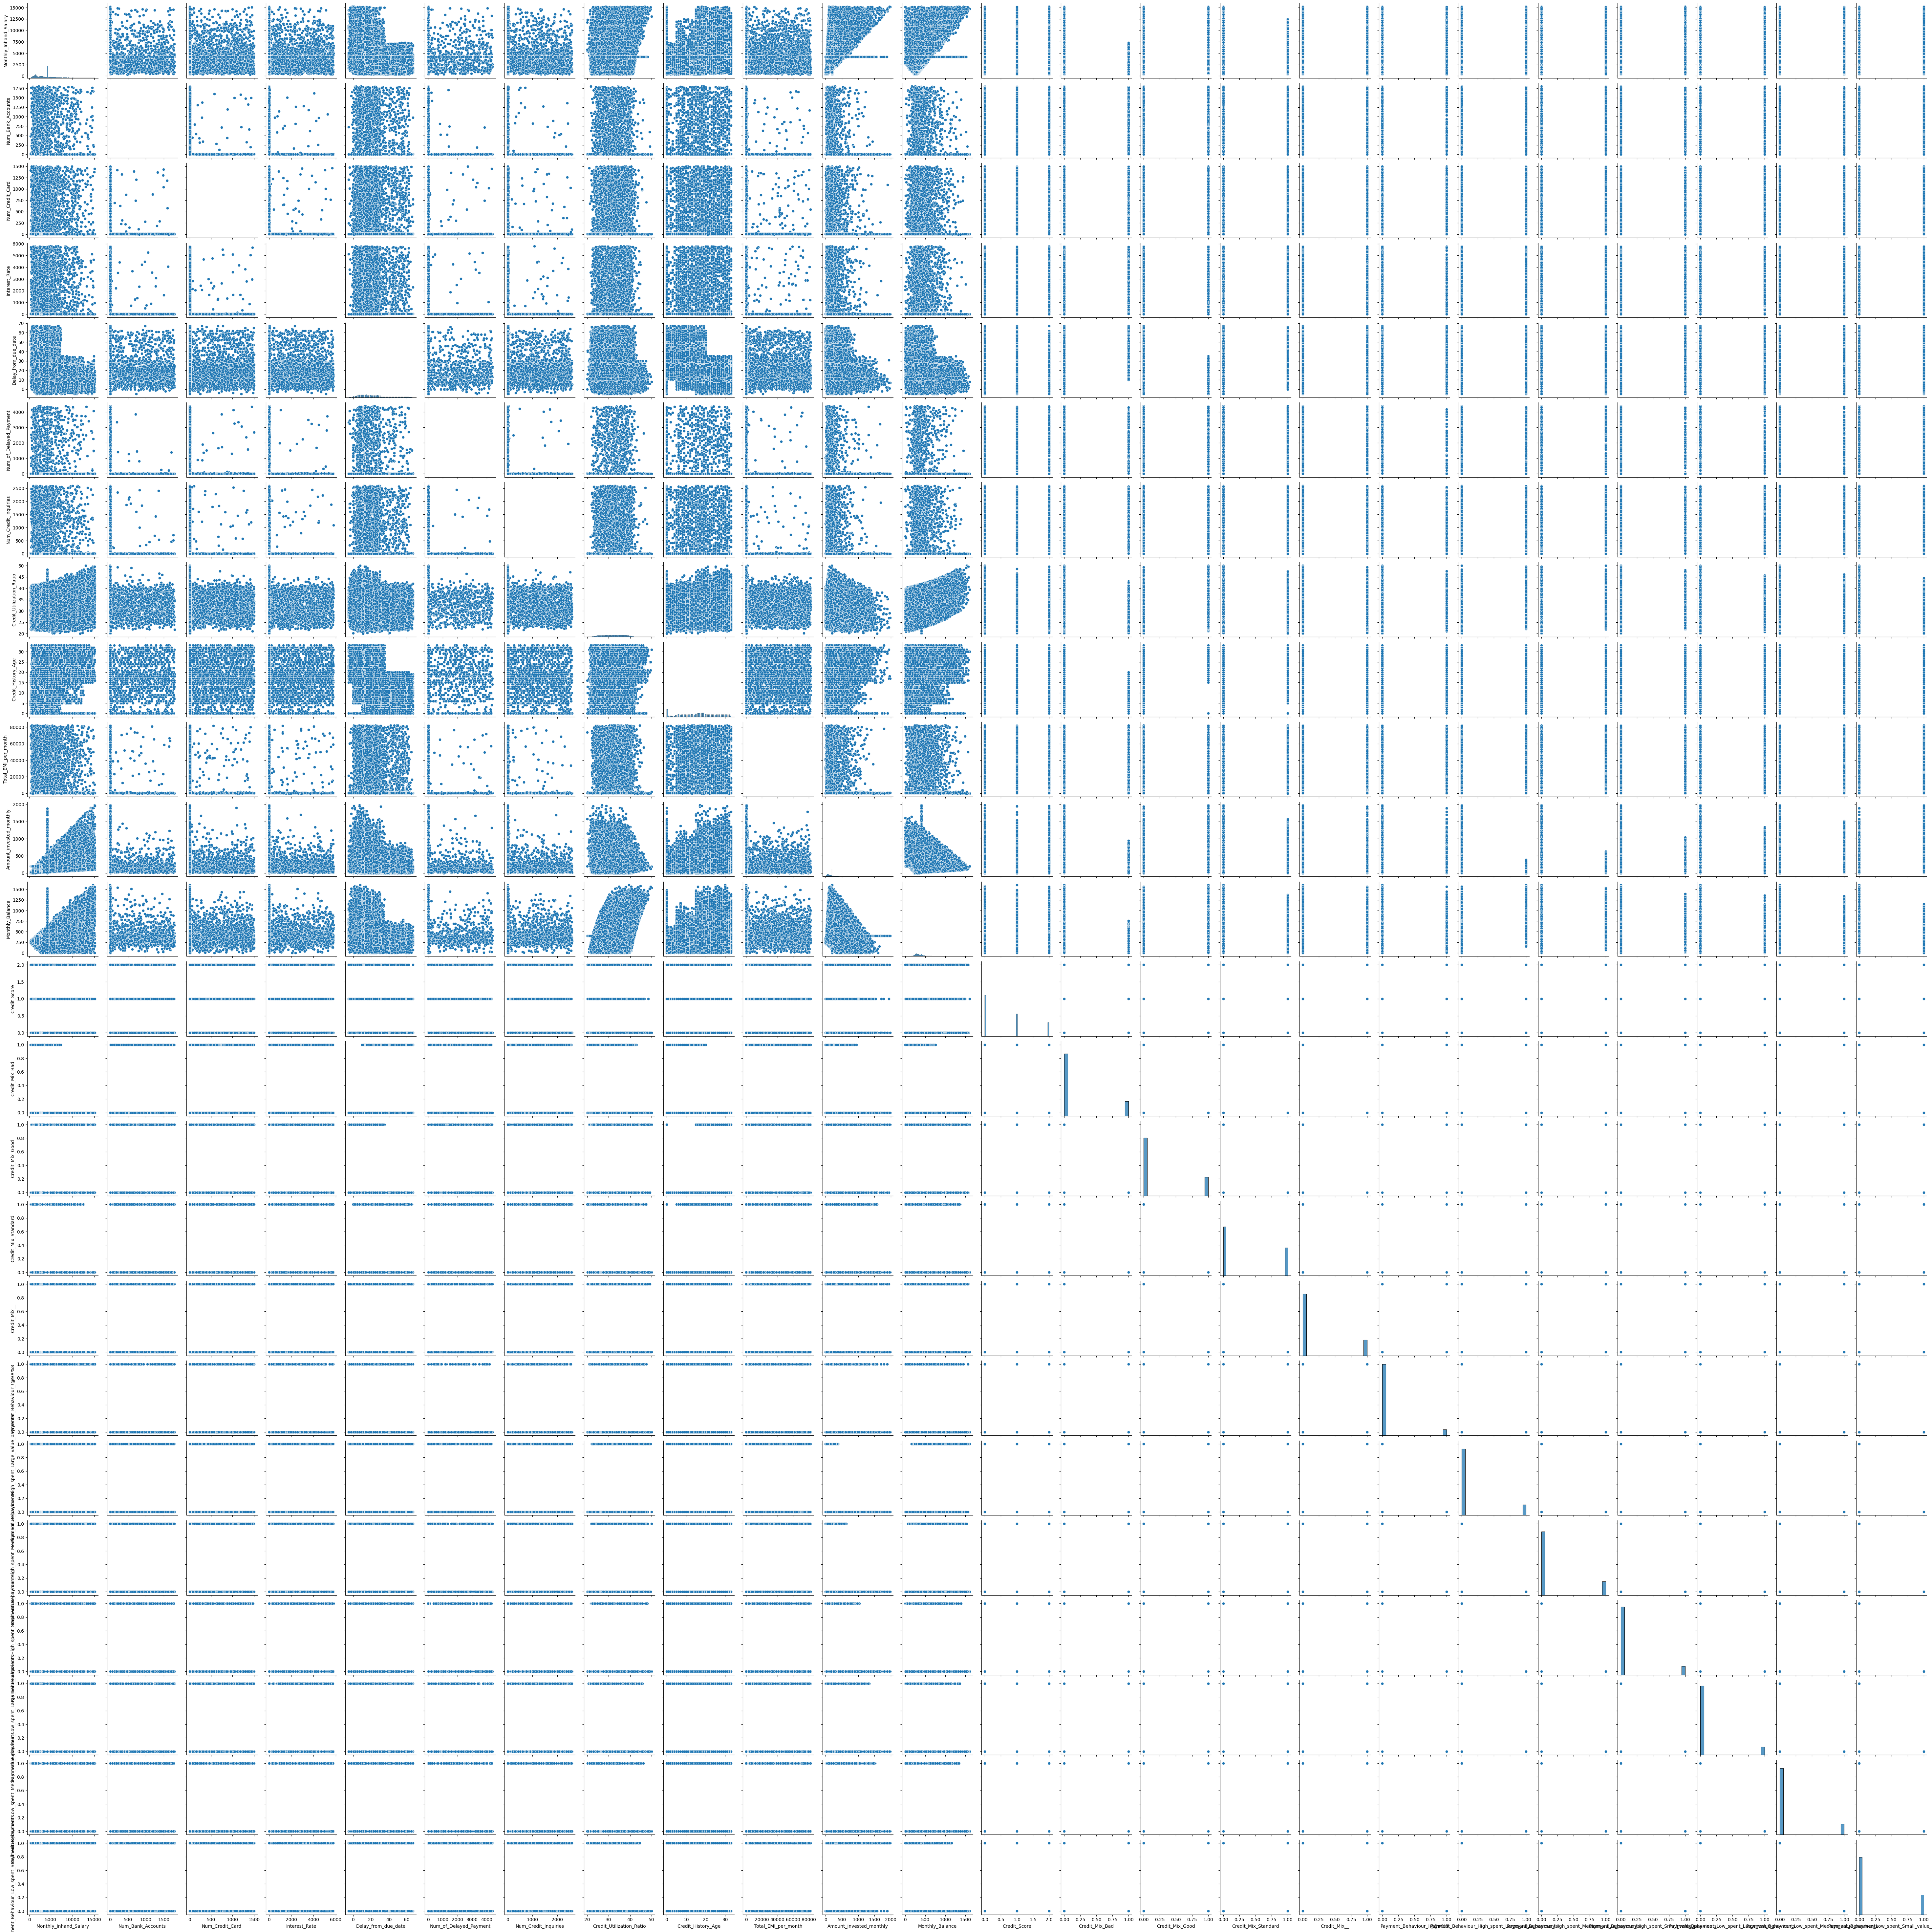

In [372]:
sns.pairplot(df)

<Axes: >

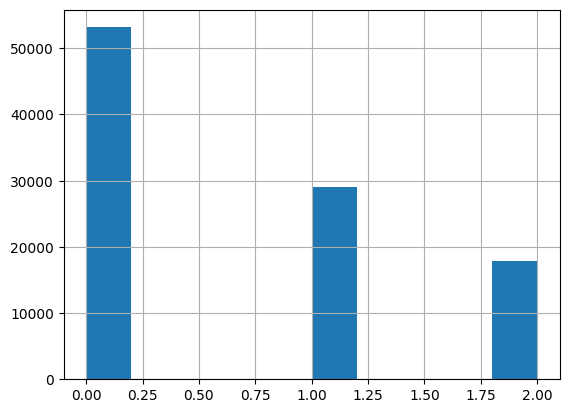

In [373]:
df['Credit_Score'].hist()

In [376]:
df.dropna(inplace=True)

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Outstanding_Debt'>

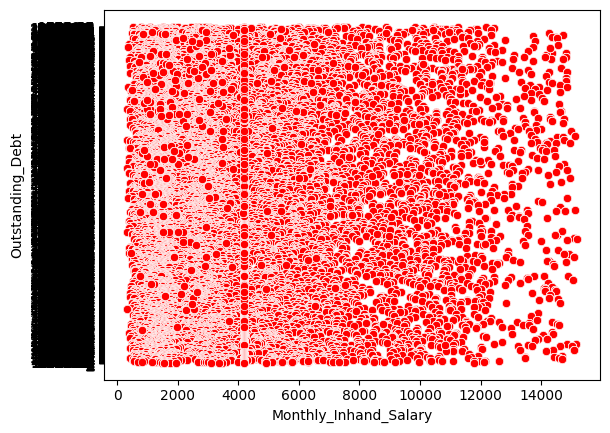

In [378]:
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")


#Importing Needed Libraries

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



#Feature Scalling

In [392]:
# ipython-input-336-cab050dea8d3
X = df.drop(columns=['Credit_Score'])
y=df['Credit_Score']
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X_imputed = imputer.fit_transform(X)
scaled_data = scaler.fit_transform(X_imputed)




/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Payment_of_Min_Amount']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


# Train/Test Split

In [393]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


#Computing Logistic Regression

In [394]:
lm = LogisticRegression(solver='newton-cg', max_iter=2000)
lm.fit(X_train, y_train)
predictions=lm.predict(X_test)

In [395]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69     15873
           1       0.63      0.45      0.52      8805
           2       0.52      0.57      0.54      5322

    accuracy                           0.62     30000
   macro avg       0.60      0.58      0.59     30000
weighted avg       0.62      0.62      0.61     30000



[[11587  2145  2141]
 [ 4148  3947   710]
 [ 2128   142  3052]]


In [ ]:
# As we see it produced relatively low accuracy,precision and recall so let's try another algorithm that fits this data set more

#Computing RFC

In [396]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [397]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71     15873
           1       0.67      0.67      0.67      8805
           2       0.58      0.59      0.59      5322

    accuracy                           0.68     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.68      0.68      0.68     30000



[[11323  2590  1960]
 [ 2620  5870   315]
 [ 1881   281  3160]]
